In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from sklearn import preprocessing
%matplotlib inline
from scipy.signal import butter, lfilter, freqz
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from collections import Counter
from imblearn.over_sampling import SMOTE
from keras.models import Sequential
from keras.layers import  Dense, LSTM, Dropout
from keras.layers import Flatten
from keras.regularizers import L1L2
import keras_tuner as kt
from keras import regularizers

In [79]:
df = pd.read_csv("running.csv")
df

,Acc_X,Acc_Y,Acc_Z
0,-0.654270,-9.721546,1.457198
1,-0.654270,-9.819020,-0.250593
2,-0.654270,-10.098344,-1.174555
3,-0.654270,-8.955621,1.076085
4,-0.654270,-9.929553,-0.505975
...,...,...,...
1507,-3.471593,-10.618559,0.802468
1508,-2.438870,-9.334789,1.514777
1509,-1.129311,-9.840170,1.750093
1510,-1.047292,-9.827171,2.336194


In [80]:
df.shape

(1512, 3)

In [81]:
X = df

In [82]:
print("DF HEAD: ",df.head)
print("DF DTYPE: ",df.dtypes)
print("DF SHAPE: ",df.shape)

print("DF ISNULL: ",df.isnull().sum())

DF HEAD:  <bound method NDFrame.head of          Acc_X      Acc_Y     Acc_Z
0    -0.654270  -9.721546  1.457198
1    -0.654270  -9.819020 -0.250593
2    -0.654270 -10.098344 -1.174555
3    -0.654270  -8.955621  1.076085
4    -0.654270  -9.929553 -0.505975
...        ...        ...       ...
1507 -3.471593 -10.618559  0.802468
1508 -2.438870  -9.334789  1.514777
1509 -1.129311  -9.840170  1.750093
1510 -1.047292  -9.827171  2.336194
1511  0.611206  -1.003375  8.672960

[1512 rows x 3 columns]>
DF DTYPE:  Acc_X    float64
Acc_Y    float64
Acc_Z    float64
dtype: object
DF SHAPE:  (1512, 3)
DF ISNULL:  Acc_X    0
Acc_Y    0
Acc_Z    0
dtype: int64


In [83]:
import plotly.express as px
import seaborn as sns
dfv= df[["Acc_X","Acc_Y","Acc_Z"]]
dfbv=dfv.isnull().sum()


sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(15,15)})
#data_canada = px.data.gapminder().query("country == 'Canada'")
fig = px.bar(dfbv,title="Checking for Null values")

fig.show()

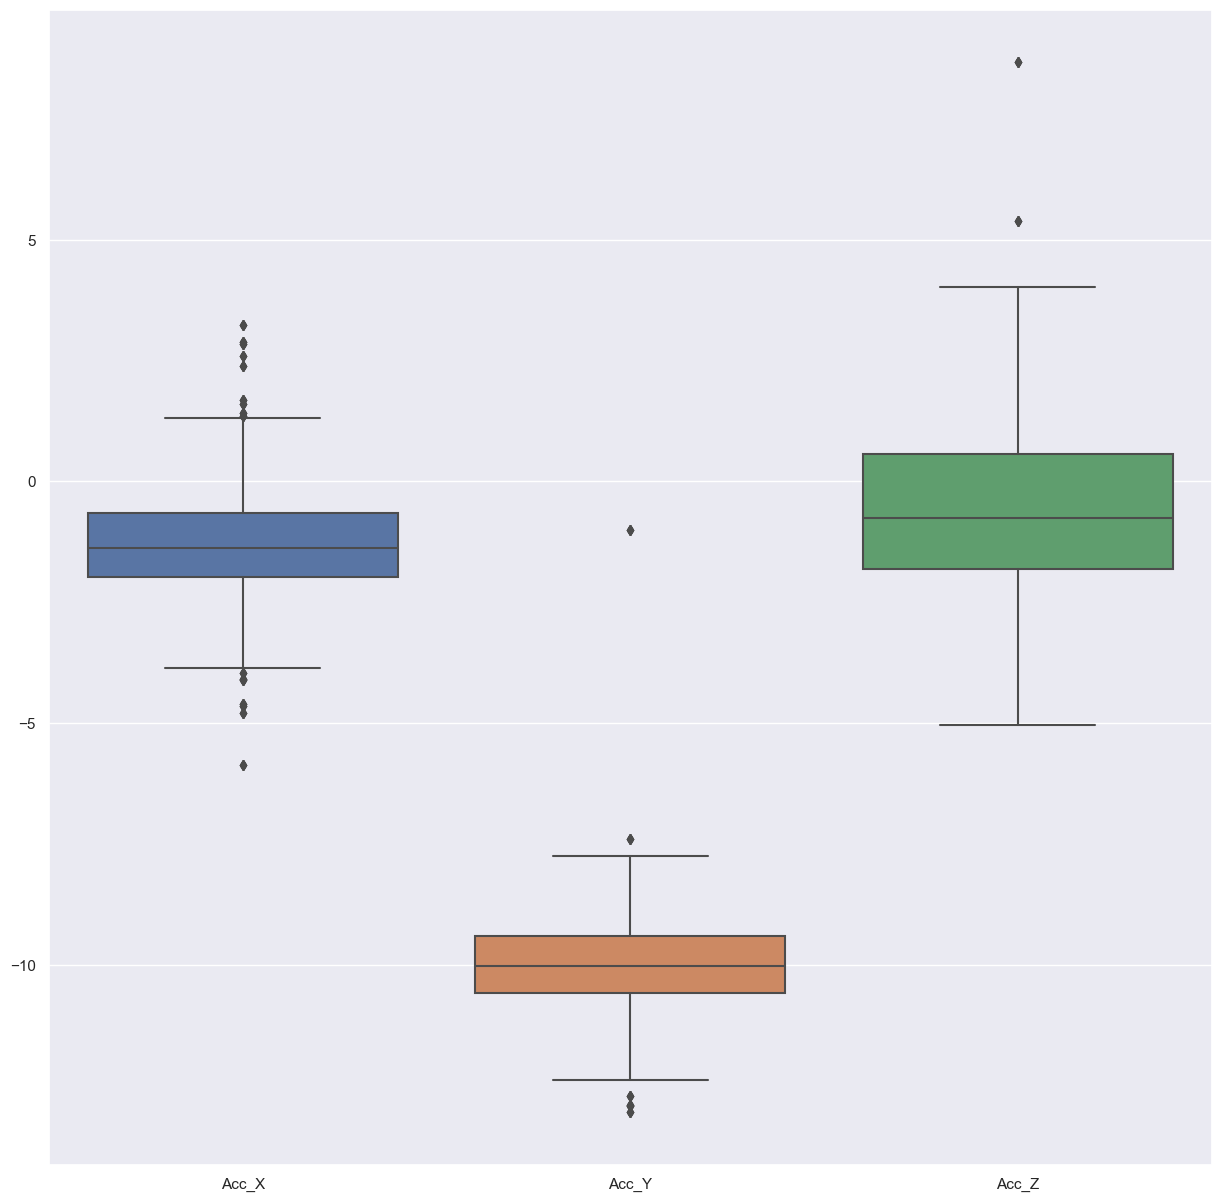

In [84]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(15,15)})
fig= sns.boxplot(data=df.iloc[0:25955,0:3])
figure=fig.get_figure()
figure.savefig("withOutliers.png")

In [85]:
Q1x = df['Acc_X'].quantile(0.25)
Q1y = df['Acc_Y'].quantile(0.25)   
Q1z = df['Acc_Z'].quantile(0.25)

Q3x = df['Acc_X'].quantile(0.75)
Q3y = df['Acc_Y'].quantile(0.75)   
Q3z = df['Acc_Z'].quantile(0.75)
  
IQRx = Q3x - Q1x
IQRy = Q3y - Q1y
IQRz = Q3z - Q1z

lim1x=(Q1x- 1.5 * IQRx)
lim1y=(Q1y- 1.5 * IQRy)
lim1z=(Q1z- 1.5 * IQRz)

lim2x=(Q3x + 1.5 * IQRx)
lim2y=(Q3y + 1.5 * IQRy)
lim2z=(Q3z + 1.5 * IQRz)

tenthx= df['Acc_X'].quantile(0.10)
tenthy= df['Acc_Y'].quantile(0.10)
tenthz= df['Acc_Z'].quantile(0.10)

ninetyx=df['Acc_X'].quantile(0.90)
ninetyy=df['Acc_Y'].quantile(0.90)
ninetyz=df['Acc_Z'].quantile(0.90)
    
# print(tenthx,ninetyx)
df['Acc_X']=np.where(df['Acc_X']<lim1x,tenthx,df['Acc_X'])
df['Acc_X']=np.where(df['Acc_X']>lim2x,ninetyx,df['Acc_X'])

df['Acc_Y']=np.where(df['Acc_Y']<lim1y,tenthy,df['Acc_Y'])
df['Acc_Y']=np.where(df['Acc_Y']>lim2y,ninetyy,df['Acc_Y'])

df['Acc_Z']=np.where(df['Acc_Z']<lim1z,tenthz,df['Acc_Z'])
df['Acc_Z']=np.where(df['Acc_Z']>lim2z,ninetyz,df['Acc_Z'])

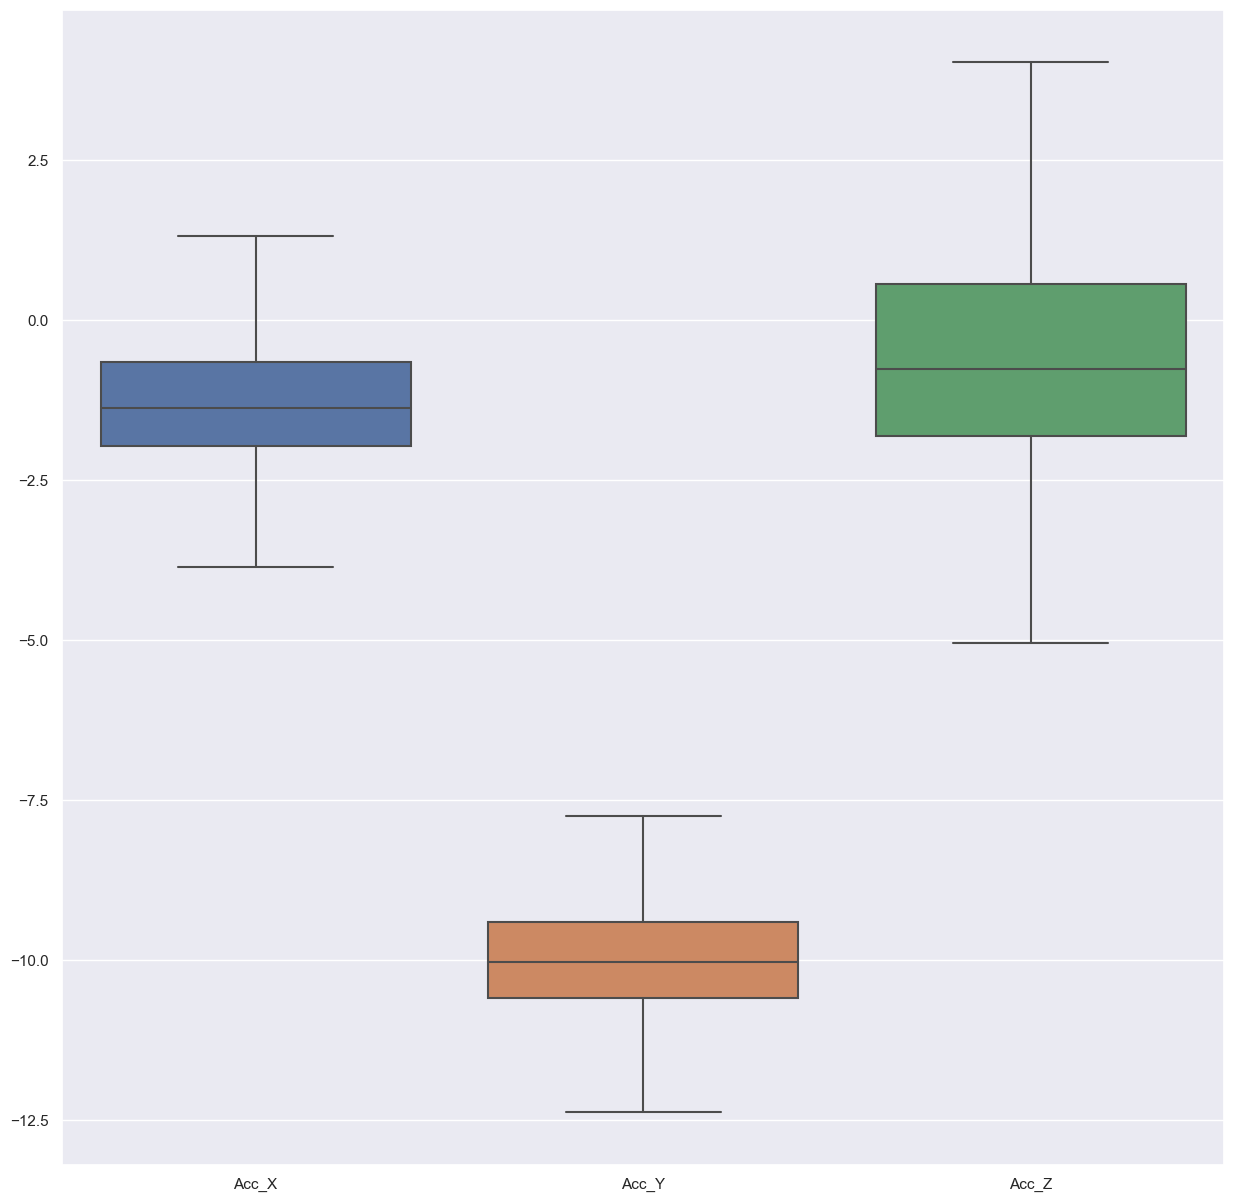

In [86]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(15,15)})
fig=sns.boxplot(data=df.iloc[0:6000,0:3],whis=[0, 100])
count=0
figure=fig.get_figure()
figure.savefig("withOut_Outliers(Final Har_intensity).png")

In [87]:
def butter_lowpass(cutoff, fs, order):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order):
    b, a = butter_lowpass(cutoff, fs, order=order)
    print(b,a)
    y = lfilter(b, a, data)
    return y

df['Acc_X']= butter_lowpass_filter(df['Acc_X'], 10, 100, 10)
df['Acc_Y']= butter_lowpass_filter(df['Acc_Y'], 10, 100, 10)
df['Acc_Z']= butter_lowpass_filter(df['Acc_Z'], 10, 100, 10)

[1.68358141e-06 1.68358141e-05 7.57611633e-05 2.02029769e-04
 3.53552096e-04 4.24262515e-04 3.53552096e-04 2.02029769e-04
 7.57611633e-05 1.68358141e-05 1.68358141e-06] [ 1.00000000e+00 -5.98758963e+00  1.66721933e+01 -2.82587879e+01
  3.21597565e+01 -2.56017496e+01  1.44056874e+01 -5.64707434e+00
  1.47372794e+00 -2.30919346e-01  1.64796305e-02]
[1.68358141e-06 1.68358141e-05 7.57611633e-05 2.02029769e-04
 3.53552096e-04 4.24262515e-04 3.53552096e-04 2.02029769e-04
 7.57611633e-05 1.68358141e-05 1.68358141e-06] [ 1.00000000e+00 -5.98758963e+00  1.66721933e+01 -2.82587879e+01
  3.21597565e+01 -2.56017496e+01  1.44056874e+01 -5.64707434e+00
  1.47372794e+00 -2.30919346e-01  1.64796305e-02]
[1.68358141e-06 1.68358141e-05 7.57611633e-05 2.02029769e-04
 3.53552096e-04 4.24262515e-04 3.53552096e-04 2.02029769e-04
 7.57611633e-05 1.68358141e-05 1.68358141e-06] [ 1.00000000e+00 -5.98758963e+00  1.66721933e+01 -2.82587879e+01
  3.21597565e+01 -2.56017496e+01  1.44056874e+01 -5.64707434e+00
  1

In [88]:
#feature enginerring
df=df.eval('Mean = (Acc_X+Acc_Y+Acc_Z)/3')
df['Median']=df.loc[:,['Acc_X','Acc_Y','Acc_Z']].median(axis=1)
df['Variance']=df.loc[:,['Acc_X','Acc_Y','Acc_Z']].var(axis=1)
df['Standard_Deviation']=df.loc[:,['Acc_X','Acc_Y','Acc_Z']].std(axis=1)
df

,Acc_X,Acc_Y,Acc_Z,Mean,Median,Variance,Standard_Deviation
0,-0.000001,-0.000016,0.000002,-0.000005,-0.000001,9.997948e-11,0.000010
1,-0.000019,-0.000278,0.000039,-0.000086,-0.000019,2.852189e-08,0.000169
2,-0.000155,-0.002312,0.000296,-0.000724,-0.000155,1.941891e-06,0.001394
3,-0.000843,-0.012559,0.001450,-0.003984,-0.000843,5.646022e-05,0.007514
4,-0.003377,-0.050345,0.005163,-0.016186,-0.003377,8.933406e-04,0.029889
...,...,...,...,...,...,...,...
1507,-1.637045,-10.287375,-0.552160,-4.158860,-1.637045,2.846327e+01,5.335098
1508,-1.562152,-10.138353,-0.545346,-4.081951,-1.562152,2.776848e+01,5.269581
1509,-1.521083,-10.003758,-0.490638,-4.005160,-1.521083,2.725284e+01,5.220425
1510,-1.521671,-9.925527,-0.384306,-3.943834,-1.521671,2.715888e+01,5.211418


In [89]:
sort=np.sort(df.loc[:,['Acc_X','Acc_Y','Acc_Z']],axis=1)

q3=[]
q1=[]
for x in sort:

    q3x,q1x= np.percentile(x,[75,25])
    q3.append(q3x)
    q1.append(q1x)
df['Q3']=q3
df['Q1']=q1
df

,Acc_X,Acc_Y,Acc_Z,Mean,Median,Variance,Standard_Deviation,Q3,Q1
0,-0.000001,-0.000016,0.000002,-0.000005,-0.000001,9.997948e-11,0.000010,6.758973e-07,-0.000009
1,-0.000019,-0.000278,0.000039,-0.000086,-0.000019,2.852189e-08,0.000169,1.004426e-05,-0.000148
2,-0.000155,-0.002312,0.000296,-0.000724,-0.000155,1.941891e-06,0.001394,7.013108e-05,-0.001234
3,-0.000843,-0.012559,0.001450,-0.003984,-0.000843,5.646022e-05,0.007514,3.033474e-04,-0.006701
4,-0.003377,-0.050345,0.005163,-0.016186,-0.003377,8.933406e-04,0.029889,8.930138e-04,-0.026861
...,...,...,...,...,...,...,...,...,...
1507,-1.637045,-10.287375,-0.552160,-4.158860,-1.637045,2.846327e+01,5.335098,-1.094602e+00,-5.962210
1508,-1.562152,-10.138353,-0.545346,-4.081951,-1.562152,2.776848e+01,5.269581,-1.053749e+00,-5.850253
1509,-1.521083,-10.003758,-0.490638,-4.005160,-1.521083,2.725284e+01,5.220425,-1.005860e+00,-5.762420
1510,-1.521671,-9.925527,-0.384306,-3.943834,-1.521671,2.715888e+01,5.211418,-9.529882e-01,-5.723599


In [90]:
def getZCR(arr):
        my_array = np.array(arr)
        return float("{0:.2f}".format((((my_array[:-1] * my_array[1:]) < 0).sum())/len(arr)))
zcr=[]
arr2=np.array(df.loc[:,['Acc_X','Acc_Y','Acc_Z']])


for x in arr2:
    zcr.append(getZCR(x))
df['ZCR']=zcr
df

,Acc_X,Acc_Y,Acc_Z,Mean,Median,Variance,Standard_Deviation,Q3,Q1,ZCR
0,-0.000001,-0.000016,0.000002,-0.000005,-0.000001,9.997948e-11,0.000010,6.758973e-07,-0.000009,0.33
1,-0.000019,-0.000278,0.000039,-0.000086,-0.000019,2.852189e-08,0.000169,1.004426e-05,-0.000148,0.33
2,-0.000155,-0.002312,0.000296,-0.000724,-0.000155,1.941891e-06,0.001394,7.013108e-05,-0.001234,0.33
3,-0.000843,-0.012559,0.001450,-0.003984,-0.000843,5.646022e-05,0.007514,3.033474e-04,-0.006701,0.33
4,-0.003377,-0.050345,0.005163,-0.016186,-0.003377,8.933406e-04,0.029889,8.930138e-04,-0.026861,0.33
...,...,...,...,...,...,...,...,...,...,...
1507,-1.637045,-10.287375,-0.552160,-4.158860,-1.637045,2.846327e+01,5.335098,-1.094602e+00,-5.962210,0.00
1508,-1.562152,-10.138353,-0.545346,-4.081951,-1.562152,2.776848e+01,5.269581,-1.053749e+00,-5.850253,0.00
1509,-1.521083,-10.003758,-0.490638,-4.005160,-1.521083,2.725284e+01,5.220425,-1.005860e+00,-5.762420,0.00
1510,-1.521671,-9.925527,-0.384306,-3.943834,-1.521671,2.715888e+01,5.211418,-9.529882e-01,-5.723599,0.00


In [91]:
def getMCR(arr):
    return getZCR(np.array(arr) - np.mean(arr))

MCR=[]
arr2=np.array(df.loc[:,['Acc_X','Acc_Y','Acc_Z']])

for x in arr2:
        MCR.append(getMCR(x))

df['MCR']=MCR
df

,Acc_X,Acc_Y,Acc_Z,Mean,Median,Variance,Standard_Deviation,Q3,Q1,ZCR,MCR
0,-0.000001,-0.000016,0.000002,-0.000005,-0.000001,9.997948e-11,0.000010,6.758973e-07,-0.000009,0.33,0.67
1,-0.000019,-0.000278,0.000039,-0.000086,-0.000019,2.852189e-08,0.000169,1.004426e-05,-0.000148,0.33,0.67
2,-0.000155,-0.002312,0.000296,-0.000724,-0.000155,1.941891e-06,0.001394,7.013108e-05,-0.001234,0.33,0.67
3,-0.000843,-0.012559,0.001450,-0.003984,-0.000843,5.646022e-05,0.007514,3.033474e-04,-0.006701,0.33,0.67
4,-0.003377,-0.050345,0.005163,-0.016186,-0.003377,8.933406e-04,0.029889,8.930138e-04,-0.026861,0.33,0.67
...,...,...,...,...,...,...,...,...,...,...,...
1507,-1.637045,-10.287375,-0.552160,-4.158860,-1.637045,2.846327e+01,5.335098,-1.094602e+00,-5.962210,0.00,0.67
1508,-1.562152,-10.138353,-0.545346,-4.081951,-1.562152,2.776848e+01,5.269581,-1.053749e+00,-5.850253,0.00,0.67
1509,-1.521083,-10.003758,-0.490638,-4.005160,-1.521083,2.725284e+01,5.220425,-1.005860e+00,-5.762420,0.00,0.67
1510,-1.521671,-9.925527,-0.384306,-3.943834,-1.521671,2.715888e+01,5.211418,-9.529882e-01,-5.723599,0.00,0.67


In [92]:
from math import e
def entropy4(labels, base=None):
    value,counts = np.unique(labels, return_counts=True)
    norm_counts = counts / counts.sum()
    base = e if base is None else base
    return -(norm_counts * np.log(norm_counts)/np.log(base)).sum()

y=[]
sort=np.sort(df.loc[:,['Acc_X','Acc_Y','Acc_Z']],axis=1)

for x in sort:
    y.append(entropy4(x))
df['Entropy']=y
df

,Acc_X,Acc_Y,Acc_Z,Mean,Median,Variance,Standard_Deviation,Q3,Q1,ZCR,MCR,Entropy
0,-0.000001,-0.000016,0.000002,-0.000005,-0.000001,9.997948e-11,0.000010,6.758973e-07,-0.000009,0.33,0.67,1.098612
1,-0.000019,-0.000278,0.000039,-0.000086,-0.000019,2.852189e-08,0.000169,1.004426e-05,-0.000148,0.33,0.67,1.098612
2,-0.000155,-0.002312,0.000296,-0.000724,-0.000155,1.941891e-06,0.001394,7.013108e-05,-0.001234,0.33,0.67,1.098612
3,-0.000843,-0.012559,0.001450,-0.003984,-0.000843,5.646022e-05,0.007514,3.033474e-04,-0.006701,0.33,0.67,1.098612
4,-0.003377,-0.050345,0.005163,-0.016186,-0.003377,8.933406e-04,0.029889,8.930138e-04,-0.026861,0.33,0.67,1.098612
...,...,...,...,...,...,...,...,...,...,...,...,...
1507,-1.637045,-10.287375,-0.552160,-4.158860,-1.637045,2.846327e+01,5.335098,-1.094602e+00,-5.962210,0.00,0.67,1.098612
1508,-1.562152,-10.138353,-0.545346,-4.081951,-1.562152,2.776848e+01,5.269581,-1.053749e+00,-5.850253,0.00,0.67,1.098612
1509,-1.521083,-10.003758,-0.490638,-4.005160,-1.521083,2.725284e+01,5.220425,-1.005860e+00,-5.762420,0.00,0.67,1.098612
1510,-1.521671,-9.925527,-0.384306,-3.943834,-1.521671,2.715888e+01,5.211418,-9.529882e-01,-5.723599,0.00,0.67,1.098612


In [93]:
for index, row in df.iterrows():
     rms=np.sqrt(((df['Acc_X'] ** 2) + (df['Acc_Y'] ** 2) +(df['Acc_Z'] ** 2))/3)
df['RMS']=rms
df

,Acc_X,Acc_Y,Acc_Z,Mean,Median,Variance,Standard_Deviation,Q3,Q1,ZCR,MCR,Entropy,RMS
0,-0.000001,-0.000016,0.000002,-0.000005,-0.000001,9.997948e-11,0.000010,6.758973e-07,-0.000009,0.33,0.67,1.098612,0.000010
1,-0.000019,-0.000278,0.000039,-0.000086,-0.000019,2.852189e-08,0.000169,1.004426e-05,-0.000148,0.33,0.67,1.098612,0.000163
2,-0.000155,-0.002312,0.000296,-0.000724,-0.000155,1.941891e-06,0.001394,7.013108e-05,-0.001234,0.33,0.67,1.098612,0.001349
3,-0.000843,-0.012559,0.001450,-0.003984,-0.000843,5.646022e-05,0.007514,3.033474e-04,-0.006701,0.33,0.67,1.098612,0.007315
4,-0.003377,-0.050345,0.005163,-0.016186,-0.003377,8.933406e-04,0.029889,8.930138e-04,-0.026861,0.33,0.67,1.098612,0.029284
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,-1.637045,-10.287375,-0.552160,-4.158860,-1.637045,2.846327e+01,5.335098,-1.094602e+00,-5.962210,0.00,0.67,1.098612,6.022593
1508,-1.562152,-10.138353,-0.545346,-4.081951,-1.562152,2.776848e+01,5.269581,-1.053749e+00,-5.850253,0.00,0.67,1.098612,5.930821
1509,-1.521083,-10.003758,-0.490638,-4.005160,-1.521083,2.725284e+01,5.220425,-1.005860e+00,-5.762420,0.00,0.67,1.098612,5.848920
1510,-1.521671,-9.925527,-0.384306,-3.943834,-1.521671,2.715888e+01,5.211418,-9.529882e-01,-5.723599,0.00,0.67,1.098612,5.801702


In [94]:
X=df
df

,Acc_X,Acc_Y,Acc_Z,Mean,Median,Variance,Standard_Deviation,Q3,Q1,ZCR,MCR,Entropy,RMS
0,-0.000001,-0.000016,0.000002,-0.000005,-0.000001,9.997948e-11,0.000010,6.758973e-07,-0.000009,0.33,0.67,1.098612,0.000010
1,-0.000019,-0.000278,0.000039,-0.000086,-0.000019,2.852189e-08,0.000169,1.004426e-05,-0.000148,0.33,0.67,1.098612,0.000163
2,-0.000155,-0.002312,0.000296,-0.000724,-0.000155,1.941891e-06,0.001394,7.013108e-05,-0.001234,0.33,0.67,1.098612,0.001349
3,-0.000843,-0.012559,0.001450,-0.003984,-0.000843,5.646022e-05,0.007514,3.033474e-04,-0.006701,0.33,0.67,1.098612,0.007315
4,-0.003377,-0.050345,0.005163,-0.016186,-0.003377,8.933406e-04,0.029889,8.930138e-04,-0.026861,0.33,0.67,1.098612,0.029284
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,-1.637045,-10.287375,-0.552160,-4.158860,-1.637045,2.846327e+01,5.335098,-1.094602e+00,-5.962210,0.00,0.67,1.098612,6.022593
1508,-1.562152,-10.138353,-0.545346,-4.081951,-1.562152,2.776848e+01,5.269581,-1.053749e+00,-5.850253,0.00,0.67,1.098612,5.930821
1509,-1.521083,-10.003758,-0.490638,-4.005160,-1.521083,2.725284e+01,5.220425,-1.005860e+00,-5.762420,0.00,0.67,1.098612,5.848920
1510,-1.521671,-9.925527,-0.384306,-3.943834,-1.521671,2.715888e+01,5.211418,-9.529882e-01,-5.723599,0.00,0.67,1.098612,5.801702


In [95]:
N_TIME_STEPS = 10
N_FEATURES = 13
step = 1
segments = []
labels = []

#segemting data
for i in range(0, len(df) - N_TIME_STEPS, step):
    accxs = df['Acc_X'].values[i: i + N_TIME_STEPS]
    accys = df['Acc_Y'].values[i: i + N_TIME_STEPS]
    acczs = df['Acc_Z'].values[i: i + N_TIME_STEPS]
    mean = df['Mean'].values[i: i + N_TIME_STEPS]
    median = df['Median'].values[i: i + N_TIME_STEPS]
    variance = df['Variance'].values[i: i + N_TIME_STEPS]
    SD = df['Standard_Deviation'].values[i: i + N_TIME_STEPS]
    rms = df['RMS'].values[i: i + N_TIME_STEPS]
    q3 = df['Q3'].values[i: i + N_TIME_STEPS]
    q1 = df['Q1'].values[i: i + N_TIME_STEPS]
    Zcr = df['ZCR'].values[i: i + N_TIME_STEPS]
    mcr = df['MCR'].values[i: i + N_TIME_STEPS]
    entrophy = df['Entropy'].values[i: i + N_TIME_STEPS]
    
#     label = stats.mode(df['Class'][i: i + N_TIME_STEPS])[0][0]
    segments.append([accxs, accys, acczs,mean,median,variance,SD,rms,q3,q1,Zcr,mcr,entrophy]) 
#     labels.append(label)
    

print("SEGMENTS SHAPE: ",np.array(segments).shape)
# print("LABELS SHAPE: ",np.array(labels).shape)

SEGMENTS SHAPE:  (1502, 13, 10)


In [96]:
reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, N_TIME_STEPS, N_FEATURES)
print("RESHAPE SHAPE: ",reshaped_segments.shape)

RESHAPE SHAPE:  (1502, 10, 13)


In [97]:
X_train, X_test = train_test_split(reshaped_segments, test_size=0.20) # 0.25 x 0.8 = 0.2
print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
# print("y_train shape: {}".format(y_train.shape))
# print("y_test shape: {}".format(y_test.shape))
# print("X_val shape: {}".format(X_val.shape))
# print("y val shape: {}".format(y_val.shape))

X_train shape: (1201, 10, 13)
X_test shape: (301, 10, 13)


In [98]:
# X1=reshaped_segments.shape
# # X1 = np.expand_dims(X1, 1)
# X1

In [99]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from numpy import array
from keras.models import load_model

loaded_model=tf.keras.models.load_model("modelall9.h5")
loaded_model

In [102]:
predict_x=(loaded_model.predict(X_train) > 0.5).astype("int32")
classes_x=np.argmax(predict_x,axis=1)


38/38 [==============================] - 7s 173ms/step


In [104]:
classes_x

array([30, 30, 30, ..., 30, 30, 30], dtype=int64)